# Step 5 : Exploratory Data Analysis (EDA) for the speed to find a civilian job (FINDJOB)

variable FINDJOB has 2 labels : find a job within 6 months vs find a job after 6 months. 

## Import Data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file
df = pd.read_csv("Findjob_encoded.csv")

In [3]:
df

,FINDJOB,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,...,F_RACETHN_Mixed race,F_RACETHN_White,F_MARITAL_Married/Live with a partner,F_MARITAL_Never Married,Branch_Army,Branch_Coast_Guard,Branch_Marines,Branch_Muti-Branch,Branch_Navy,p_income
0,1,4,0,2,3,3,0,2,4,3,...,0,1,1,0,0,0,0,1,0,31500
1,0,4,2,2,2,3,0,3,3,2,...,0,1,1,0,1,0,0,0,0,75000
2,1,4,1,2,2,2,1,3,4,2,...,0,1,1,0,0,0,0,0,1,31500
3,1,4,3,2,1,2,2,2,4,2,...,0,1,1,0,0,0,0,0,0,62500
4,1,4,0,2,2,2,0,2,4,2,...,0,0,1,0,0,0,1,0,0,44000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,2,1,1,2,2,1,1,2,1,...,0,1,0,0,0,0,0,0,1,63000
237,1,1,0,3,2,3,3,0,2,1,...,0,1,0,0,0,0,0,0,1,25000
238,1,4,0,2,1,3,0,1,3,2,...,0,1,1,0,0,0,0,0,1,31500
239,1,4,3,2,1,3,2,1,2,2,...,0,1,1,0,0,0,1,0,0,62500


In [4]:
df.columns

Index(['FINDJOB', 'YEARSERV', 'RANK', 'MILTOCIV', 'CIVADJ', 'CIVADJISSc',
       'CIVADJISSe', 'MILJOBSKILLS', 'MILHELPJOB', 'F_AGECAT', 'F_EDUCCAT2',
       'MARRACTIV_Not Married', 'PARACTIV_Yes', 'COMBAT_Yes', 'VABENEFITS_Yes',
       'CIVADJPROBa_Yes', 'CIVADJPROBb_Yes', 'LOOKJOB_Yes(right away)',
       'SCHOOL_Yes', 'TRAUMA1_Yes', 'F_SEX_Male', 'F_HISP_Yes',
       'INJURED_Injured out of combat', 'INJURED_Not injured',
       'F_RACETHN_Black', 'F_RACETHN_Mixed race', 'F_RACETHN_White',
       'F_MARITAL_Married/Live with a partner', 'F_MARITAL_Never Married',
       'Branch_Army', 'Branch_Coast_Guard', 'Branch_Marines',
       'Branch_Muti-Branch', 'Branch_Navy', 'p_income'],
      dtype='object')

In [5]:
# Now our data has 35 variables(with all dummies)
len(df.columns)

35

## FINDJOB % among post 9/11 veterans 

In [6]:
df['FINDJOB'].value_counts()

1    144
0     97
Name: FINDJOB, dtype: int64

<AxesSubplot:xlabel='FINDJOB', ylabel='count'>

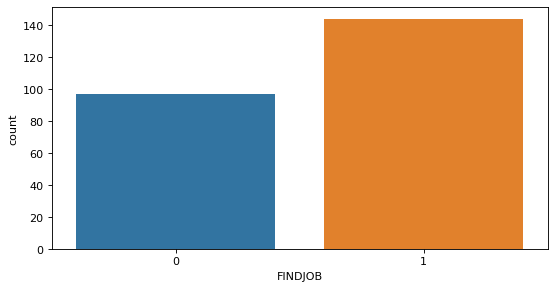

In [7]:
# The label is slightly imbalanced but not too much

plt.figure(figsize = (8,4),dpi=80)
sns.countplot(data= df,x='FINDJOB')

In [8]:
df['FINDJOB'].value_counts()/len(df)

1    0.59751
0    0.40249
Name: FINDJOB, dtype: float64

### p_income vs FINDJOB

<AxesSubplot:xlabel='FINDJOB', ylabel='p_income'>

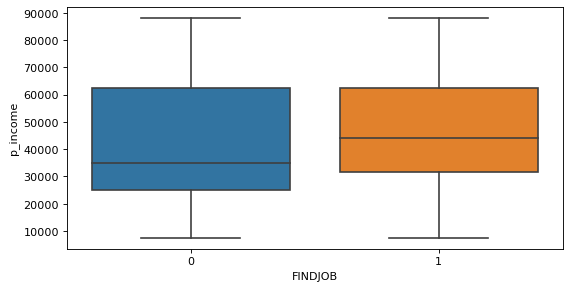

In [9]:
# Veterans who find job within 6 months have higher pay: $45,000
# Veterans who find job more than 6 months have lower pay : $35,000
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= df,x='FINDJOB', y='p_income')

### YEARSERV vs FINDJOB
- Lable : year = ['< 2 years','3-4 years','5-9 years','10-19 years','>20 years']
- Trends : 
  1. Veterans who served <2 years and > 20 years found jobs faster
  2. However, while veterans who served >20 years earned around 56,000
  3. Veterans who served <2 years earned around 35,000 
 

In [10]:
df['YEARSERV'].value_counts()

4    83
2    66
1    52
0    23
3    17
Name: YEARSERV, dtype: int64

<AxesSubplot:xlabel='FINDJOB', ylabel='YEARSERV'>

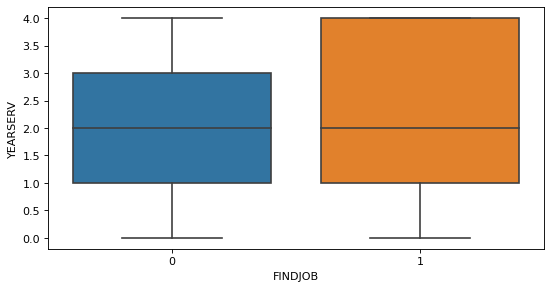

In [11]:
# Veterans who find job within 6 months tend to serve longer years
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= df,x='FINDJOB', y='YEARSERV')

In [12]:
df[df['FINDJOB']== 1]['YEARSERV'].value_counts()/len(df[df['FINDJOB']== 1])

4    0.409722
2    0.229167
1    0.201389
0    0.104167
3    0.055556
Name: YEARSERV, dtype: float64

In [13]:
df[df['FINDJOB']== 0]['YEARSERV'].value_counts()/len(df[df['FINDJOB']== 0])

2    0.340206
4    0.247423
1    0.237113
3    0.092784
0    0.082474
Name: YEARSERV, dtype: float64

In [14]:
df[df['YEARSERV']== 0]['FINDJOB'].value_counts()/len(df[df['YEARSERV']== 0])

1    0.652174
0    0.347826
Name: FINDJOB, dtype: float64

In [15]:
df[(df['YEARSERV']== 0)&(df['FINDJOB']==1)]

,FINDJOB,YEARSERV,RANK,MILTOCIV,CIVADJ,CIVADJISSc,CIVADJISSe,MILJOBSKILLS,MILHELPJOB,F_AGECAT,...,F_RACETHN_Mixed race,F_RACETHN_White,F_MARITAL_Married/Live with a partner,F_MARITAL_Never Married,Branch_Army,Branch_Coast_Guard,Branch_Marines,Branch_Muti-Branch,Branch_Navy,p_income
25,1,0,0,2,2,1,2,1,2,1,...,0,1,0,1,0,0,0,0,1,25000
33,1,0,0,3,3,3,1,2,3,1,...,0,1,1,0,0,0,0,0,0,31500
34,1,0,0,1,3,2,0,0,2,1,...,0,1,1,0,0,0,0,0,0,22500
35,1,0,0,3,3,3,0,2,4,1,...,0,1,1,0,1,0,0,0,0,31500
49,1,0,0,2,3,3,0,3,2,2,...,0,1,1,0,1,0,0,0,0,44000
72,1,0,1,1,2,2,1,1,3,2,...,0,1,0,0,1,0,0,0,0,35000
96,1,0,0,2,2,2,1,2,2,1,...,0,1,1,0,0,0,1,0,0,31500
107,1,0,0,1,3,0,0,0,2,1,...,0,1,0,1,1,0,0,0,0,25000
133,1,0,0,2,3,3,0,0,2,3,...,0,1,1,0,1,0,0,0,0,44000
154,1,0,0,1,2,2,1,2,2,1,...,0,1,1,0,1,0,0,0,0,31500


In [16]:
# Veterans who served <2 years earned $35k
df[(df['YEARSERV']== 0)&(df['FINDJOB']==1)][['p_income','F_AGECAT','RANK']].mean()

p_income    35033.333333
F_AGECAT        1.266667
RANK            0.066667
dtype: float64

In [17]:
df[df['YEARSERV']== 1]['FINDJOB'].value_counts()/len(df[df['YEARSERV']== 1])

1    0.557692
0    0.442308
Name: FINDJOB, dtype: float64

In [18]:
df[df['YEARSERV']== 2]['FINDJOB'].value_counts()/len(df[df['YEARSERV']== 2])

0    0.5
1    0.5
Name: FINDJOB, dtype: float64

In [19]:
df[df['YEARSERV']== 3]['FINDJOB'].value_counts()/len(df[df['YEARSERV']== 3])

0    0.529412
1    0.470588
Name: FINDJOB, dtype: float64

In [20]:
df[df['YEARSERV']== 4]['FINDJOB'].value_counts()/len(df[df['YEARSERV']== 4])

1    0.710843
0    0.289157
Name: FINDJOB, dtype: float64

In [21]:
# Veterans who served >20 years earned $56k
df[(df['YEARSERV']== 4)&(df['FINDJOB']==1)][['p_income','F_AGECAT','RANK']].mean()

p_income    55762.711864
F_AGECAT        2.067797
RANK            1.559322
dtype: float64

### RANK vs FINDJOB
- Label: 'E1-E6','E7-E9','WO1-WO5','O1-O10'
- Trends : Officers who didn't have jobs lined up didn't find a job faster than enlisted

In [22]:
df['RANK'].value_counts()

0    100
1     94
3     41
2      6
Name: RANK, dtype: int64

<AxesSubplot:xlabel='FINDJOB', ylabel='RANK'>

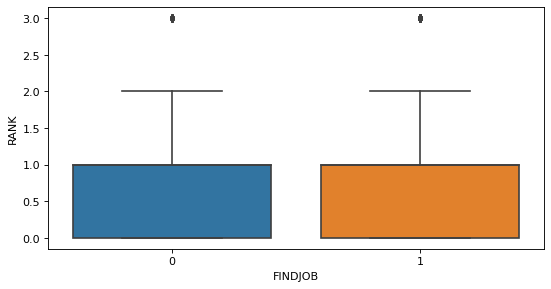

In [23]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= df,x='FINDJOB', y='RANK')

In [24]:
df[df['RANK']== 0]['FINDJOB'].value_counts()/len(df[df['RANK']== 0])

1    0.6
0    0.4
Name: FINDJOB, dtype: float64

In [25]:
df[df['RANK']== 1]['FINDJOB'].value_counts()/len(df[df['RANK']== 1])

1    0.617021
0    0.382979
Name: FINDJOB, dtype: float64

In [26]:
df[df['RANK']== 2]['FINDJOB'].value_counts()/len(df[df['RANK']== 2])

0    0.666667
1    0.333333
Name: FINDJOB, dtype: float64

In [27]:
df[df['RANK']== 3]['FINDJOB'].value_counts()/len(df[df['RANK']== 3])

1    0.585366
0    0.414634
Name: FINDJOB, dtype: float64

In [28]:
df.columns

Index(['FINDJOB', 'YEARSERV', 'RANK', 'MILTOCIV', 'CIVADJ', 'CIVADJISSc',
       'CIVADJISSe', 'MILJOBSKILLS', 'MILHELPJOB', 'F_AGECAT', 'F_EDUCCAT2',
       'MARRACTIV_Not Married', 'PARACTIV_Yes', 'COMBAT_Yes', 'VABENEFITS_Yes',
       'CIVADJPROBa_Yes', 'CIVADJPROBb_Yes', 'LOOKJOB_Yes(right away)',
       'SCHOOL_Yes', 'TRAUMA1_Yes', 'F_SEX_Male', 'F_HISP_Yes',
       'INJURED_Injured out of combat', 'INJURED_Not injured',
       'F_RACETHN_Black', 'F_RACETHN_Mixed race', 'F_RACETHN_White',
       'F_MARITAL_Married/Live with a partner', 'F_MARITAL_Never Married',
       'Branch_Army', 'Branch_Coast_Guard', 'Branch_Marines',
       'Branch_Muti-Branch', 'Branch_Navy', 'p_income'],
      dtype='object')

### CIVADJISSc vs FINDJOB
- Label : civadjissc = ['Never','Seldom','Sometimes','Frequently']

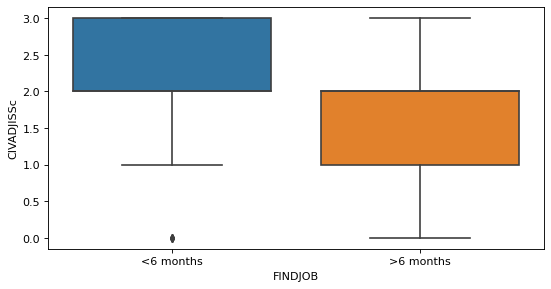

In [84]:
# Veterans who don't find job within 6 months 
# are less optimistic about their future
plt.figure(figsize = (8,4),dpi=80)
ax = sns.boxplot(data= df,x='FINDJOB', y='CIVADJISSc',order=[1,0])
ax.set(xticklabels = (['<6 months', '>6 months',]));

In [30]:
# Median is 2 : somtimes optimistic
df[df['FINDJOB'] == 1]['CIVADJISSc'].describe()

count    144.000000
mean       2.208333
std        0.783349
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: CIVADJISSc, dtype: float64

### CIVADJISSe vs FINDJOB
- civadjisse = ['Never','Seldom','Sometimes','Frequently']

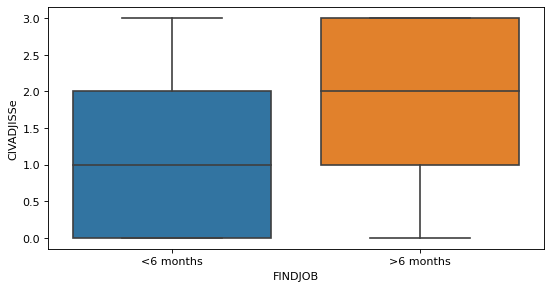

In [80]:
# Veterans who don't find job within 6 months 
# have difficulty dealing with the lack of structure in civilian life 
# frequently
plt.figure(figsize = (8,4),dpi=80)
ax = sns.boxplot(data= df,x='FINDJOB', y='CIVADJISSe',order=[1,0])
ax.set(xticklabels = (['<6 months', '>6 months',]));

### MILJOBSKILLS vs FINDJOB
- Label : miljobskills = ['not useful at all','not too useful','fairly useful','Very useful']
- Trends : 
    1. Veterans who answered 'Very useful' is the only group had FINDJOB rate > 60%
    2. Veterans who answered above 'fairly useful' have the same median income of 44,000; Salary doesn't increase much above 'fiarly useful'

In [32]:
# Most veterans said 'fairly useful'
df['MILJOBSKILLS'].value_counts()

2    84
3    79
1    54
0    24
Name: MILJOBSKILLS, dtype: int64

In [33]:
df['MILJOBSKILLS'].value_counts()/len(df)

2    0.348548
3    0.327801
1    0.224066
0    0.099585
Name: MILJOBSKILLS, dtype: float64

<AxesSubplot:xlabel='FINDJOB', ylabel='MILJOBSKILLS'>

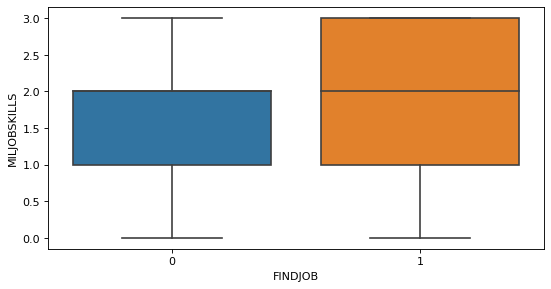

In [34]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= df,x='FINDJOB', y='MILJOBSKILLS')

In [35]:
# 50% vs 50% for 'not useful at all'
df[df['MILJOBSKILLS'] == 0]['FINDJOB'].value_counts()/len(df[df['MILJOBSKILLS'] == 0])

1    0.5
0    0.5
Name: FINDJOB, dtype: float64

In [36]:
# almost 50% vs 50% for 'not too useful'
df[df['MILJOBSKILLS'] == 1]['FINDJOB'].value_counts()/len(df[df['MILJOBSKILLS'] == 1])

1    0.518519
0    0.481481
Name: FINDJOB, dtype: float64

In [37]:
# 57% vs 42% for 'fairly useful'
df[df['MILJOBSKILLS'] == 2]['FINDJOB'].value_counts()/len(df[df['MILJOBSKILLS'] == 2])

1    0.571429
0    0.428571
Name: FINDJOB, dtype: float64

In [38]:
# 70% vs 30% for 'very useful'
df[df['MILJOBSKILLS'] == 3]['FINDJOB'].value_counts()/len(df[df['MILJOBSKILLS'] == 3])

1    0.708861
0    0.291139
Name: FINDJOB, dtype: float64

In [39]:
# Median salary $28250
df[df['MILJOBSKILLS'] == 0]['p_income'].describe()

count       24.000000
mean     38458.333333
std      23112.633787
min      10000.000000
25%      22500.000000
50%      28250.000000
75%      62500.000000
max      88000.000000
Name: p_income, dtype: float64

In [40]:
# Median salary $33250
df[df['MILJOBSKILLS'] == 1]['p_income'].describe()

count       54.000000
mean     41509.259259
std      22911.126641
min       7500.000000
25%      23125.000000
50%      33250.000000
75%      62500.000000
max      88000.000000
Name: p_income, dtype: float64

In [41]:
# Median salary $44000
df[df['MILJOBSKILLS'] == 2]['p_income'].describe()

count       84.000000
mean     47892.857143
std      19724.926348
min       7500.000000
25%      31500.000000
50%      44000.000000
75%      62500.000000
max      88000.000000
Name: p_income, dtype: float64

In [42]:
# Median salary $44000
df[df['MILJOBSKILLS'] == 3]['p_income'].describe()

count       79.000000
mean     47949.367089
std      22251.274083
min       7500.000000
25%      31500.000000
50%      44000.000000
75%      62500.000000
max      88000.000000
Name: p_income, dtype: float64

### F_EDUCCAT2 vs FINDJOB
- Label : f_educcat2 = ['High school degree','Some college(no degree)','Associate degree','Bachelors degree','MS/PHD degree']
- We want to know the result above 'Bachelors degree',label : 3
- Trends : 
    1. Surprisingly, more veterans who have degree lower than bachelors degree found a job faster 
    2. However, they earned way less than veterans who have degree above bachelors degree

<AxesSubplot:xlabel='FINDJOB', ylabel='F_EDUCCAT2'>

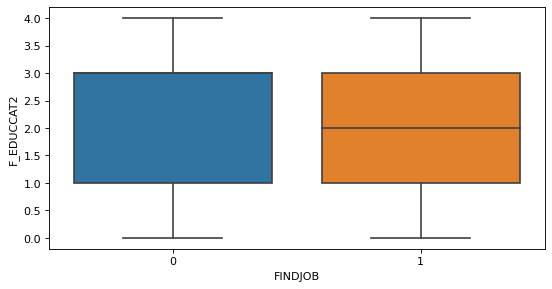

In [43]:
plt.figure(figsize = (8,4),dpi=80)
sns.boxplot(data= df,x='FINDJOB', y='F_EDUCCAT2')

In [44]:
# median = 3 Bachelors
df[df['FINDJOB'] == 0]['F_EDUCCAT2'].describe()

count    97.000000
mean      2.443299
std       1.189967
min       0.000000
25%       1.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: F_EDUCCAT2, dtype: float64

In [45]:
df[df['F_EDUCCAT2'] < 3]['FINDJOB'].value_counts()/len(df[df['F_EDUCCAT2'] < 3])

1    0.62931
0    0.37069
Name: FINDJOB, dtype: float64

In [46]:
# median income 31500
df[(df['F_EDUCCAT2'] < 3)&(df['FINDJOB']==1)]['p_income'].describe()

count       73.000000
mean     38801.369863
std      20454.003229
min       7500.000000
25%      25000.000000
50%      31500.000000
75%      44000.000000
max      88000.000000
Name: p_income, dtype: float64

In [47]:
df[df['F_EDUCCAT2'] >= 3]['FINDJOB'].value_counts()/len(df[df['F_EDUCCAT2'] >= 3])

1    0.568
0    0.432
Name: FINDJOB, dtype: float64

In [48]:
# median income 62500
df[(df['F_EDUCCAT2'] >= 3)&(df['FINDJOB']==1)]['p_income'].describe()

count       71.000000
mean     55528.169014
std      18802.524018
min      17500.000000
25%      44000.000000
50%      62500.000000
75%      62750.000000
max      88000.000000
Name: p_income, dtype: float64

In [49]:
# This result is similar to regular university graduates'
df[df['F_EDUCCAT2'] == 3]['FINDJOB'].value_counts()/len(df[df['F_EDUCCAT2'] == 3])

1    0.534247
0    0.465753
Name: FINDJOB, dtype: float64

In [50]:
df[df['F_EDUCCAT2'] == 4]['FINDJOB'].value_counts()/len(df[df['F_EDUCCAT2'] == 4])

1    0.615385
0    0.384615
Name: FINDJOB, dtype: float64

### MARRACTIV_Not Married vs FINDJOB

In [51]:
# Similar trends for whether are married
df[df['MARRACTIV_Not Married'] == 0]['FINDJOB'].value_counts()/len(df[df['MARRACTIV_Not Married'] == 0])

1    0.589744
0    0.410256
Name: FINDJOB, dtype: float64

In [52]:
df[df['MARRACTIV_Not Married'] == 1]['FINDJOB'].value_counts()/len(df[df['MARRACTIV_Not Married'] == 1])

1    0.611765
0    0.388235
Name: FINDJOB, dtype: float64

### PARACTIV_Yes vs FINDJOB

In [53]:
# Similar trend for whether are parents
df[df['PARACTIV_Yes'] == 0]['FINDJOB'].value_counts()/len(df[df['PARACTIV_Yes'] == 0])

1    0.574627
0    0.425373
Name: FINDJOB, dtype: float64

In [54]:
df[df['PARACTIV_Yes'] == 1]['FINDJOB'].value_counts()/len(df[df['PARACTIV_Yes'] == 1])

1    0.626168
0    0.373832
Name: FINDJOB, dtype: float64

### COMBAT_Yes vs FINDJOB

In [55]:
# Similar trend for whether have combat
df[df['COMBAT_Yes'] == 1]['FINDJOB'].value_counts()/len(df[df['COMBAT_Yes'] == 1])

1    0.6
0    0.4
Name: FINDJOB, dtype: float64

In [56]:
df[df['COMBAT_Yes'] == 0]['FINDJOB'].value_counts()/len(df[df['COMBAT_Yes'] == 0])

1    0.594059
0    0.405941
Name: FINDJOB, dtype: float64

### VABENEFITS_Yes

In [57]:
# Veterans who didn't receive VA benefits found job faster
# With a lower potential income (Check EDA for p_income)
df[df['VABENEFITS_Yes'] == 0]['FINDJOB'].value_counts()/len(df[df['VABENEFITS_Yes'] == 0])

1    0.675676
0    0.324324
Name: FINDJOB, dtype: float64

In [58]:
df[df['VABENEFITS_Yes'] == 1]['FINDJOB'].value_counts()/len(df[df['VABENEFITS_Yes'] == 1])

1    0.583333
0    0.416667
Name: FINDJOB, dtype: float64

In [59]:
# Doesn't have much difference; only max is different : 63,000 vs 88,000
df[(df['VABENEFITS_Yes'] ==0)&(df['FINDJOB']==1)]['p_income'].describe()

count       25.000000
mean     42640.000000
std      15181.210975
min      12500.000000
25%      31500.000000
50%      44000.000000
75%      62500.000000
max      63000.000000
Name: p_income, dtype: float64

In [60]:
df[(df['VABENEFITS_Yes'] ==1)&(df['FINDJOB']==1)]['p_income'].describe()

count      119.000000
mean     47974.789916
std      22326.719641
min       7500.000000
25%      31500.000000
50%      44000.000000
75%      62500.000000
max      88000.000000
Name: p_income, dtype: float64

### CIVADJPROBa_Yes vs FINDJOB

In [61]:
# Most veterans who find job within 6 months don't have trouble paying bills
df[df['FINDJOB']==1]['CIVADJPROBa_Yes'].value_counts()/len(df[df['FINDJOB']==1])

0    0.631944
1    0.368056
Name: CIVADJPROBa_Yes, dtype: float64

In [62]:
# Most veterans who don't find job within 6 months have trouble paying bills
# Veterans who don't find job within 6 months have more trouble paying bills
df[df['FINDJOB']==0]['CIVADJPROBa_Yes'].value_counts()/len(df[df['FINDJOB']==0])

1    0.536082
0    0.463918
Name: CIVADJPROBa_Yes, dtype: float64

### CIVADJPROBb_Yes vs FINDJOB

In [63]:
# Similar trend for whether receive food benefits
df[df['FINDJOB']==1]['CIVADJPROBb_Yes'].value_counts()/len(df[df['FINDJOB']==1])

0    0.881944
1    0.118056
Name: CIVADJPROBb_Yes, dtype: float64

In [64]:
# However, 10% more veterans receive food benefits in this group
df[df['FINDJOB']==0]['CIVADJPROBb_Yes'].value_counts()/len(df[df['FINDJOB']==0])

0    0.762887
1    0.237113
Name: CIVADJPROBb_Yes, dtype: float64

### LOOKJOB_Yes(right away) vs FINDJOB

In [65]:
# Veterans who look jobs right away found job faster
df[df['LOOKJOB_Yes(right away)'] == 1]['FINDJOB'].value_counts()/len(df[df['LOOKJOB_Yes(right away)'] == 1])

1    0.647059
0    0.352941
Name: FINDJOB, dtype: float64

In [66]:
df[df['LOOKJOB_Yes(right away)'] == 0]['FINDJOB'].value_counts()/len(df[df['LOOKJOB_Yes(right away)'] == 0])

1    0.511364
0    0.488636
Name: FINDJOB, dtype: float64

### TRAUMA_Yes

In [67]:
# Veterans who had no trauma found jobs faster
df[df['TRAUMA1_Yes'] == 1]['FINDJOB'].value_counts()/len(df[df['TRAUMA1_Yes'] == 1])

1    0.55
0    0.45
Name: FINDJOB, dtype: float64

In [68]:
df[df['TRAUMA1_Yes'] == 0]['FINDJOB'].value_counts()/len(df[df['TRAUMA1_Yes'] == 0])

1    0.644628
0    0.355372
Name: FINDJOB, dtype: float64

### F_SEX_Male

In [69]:
# Male tend to find job faster
df['F_SEX_Male'].value_counts()/len(df)

1    0.788382
0    0.211618
Name: F_SEX_Male, dtype: float64

In [70]:
df[df['F_SEX_Male'] == 1]['FINDJOB'].value_counts()/len(df[df['F_SEX_Male'] == 1])

1    0.615789
0    0.384211
Name: FINDJOB, dtype: float64

In [71]:
df[df['F_SEX_Male'] == 0]['FINDJOB'].value_counts()/len(df[df['F_SEX_Male'] == 0])

1    0.529412
0    0.470588
Name: FINDJOB, dtype: float64

### F_HISP_Yes

In [72]:
# Hip tend to find job faster
df['F_HISP_Yes'].value_counts()/len(df)

0    0.817427
1    0.182573
Name: F_HISP_Yes, dtype: float64

In [73]:
df[df['F_HISP_Yes'] == 1]['FINDJOB'].value_counts()/len(df[df['F_HISP_Yes'] == 1])

1    0.704545
0    0.295455
Name: FINDJOB, dtype: float64

In [74]:
df[df['F_HISP_Yes'] == 0]['FINDJOB'].value_counts()/len(df[df['F_HISP_Yes'] == 0])

1    0.573604
0    0.426396
Name: FINDJOB, dtype: float64